## 1. 라이브러리 임포트

In [19]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## 2. 데이터 전처리

In [5]:
data = pd.read_csv("./data.csv", index_col=0)
data

,text,target
0,"News Thanks To Trump, Companies Are Pulling O...",0
1,politicsNews Pelosi says Republicans showed 't...,1
2,worldnews Venezuela political talks end withou...,1
3,"politicsNews Trump considers Fed's Powell, eco...",1
4,left-news COLLEGE QB Kneed Out Of Anger Over T...,0
...,...,...
44893,politicsNews Trump goes to his comfort zone: c...,1
44894,politics WATCH WHAT HAPPENS WHEN COLLEGE STUDE...,0
44895,News Did You Spot The ‘Pants On Fire’ Moment ...,0
44896,News Netanyahu Says ‘Respected Western Opinio...,0


In [6]:
X = data.drop(["target"],axis=1)
y = data["target"]

In [8]:
ps = PorterStemmer()

corpus=[]

for i in range(0,len(X)):
    review = re.sub("[^a-zA-Z]"," ",X["text"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

In [9]:
vector = TfidfVectorizer(max_features =5000, ngram_range=(1,3))
X = vector.fit_transform(corpus).toarray()

## 3. 모델링

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
model = MultinomialNB()

model.fit(X_train, y_train)
pred = model.predict(X_test)

## 4. 모델 평가

In [14]:
score = metrics.accuracy_score(y_test, pred)
score

0.9560504825538233

In [17]:
print(classification_report(y_test, pred, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       0.96      0.95      0.96      7082
        Real       0.95      0.96      0.95      6388

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470



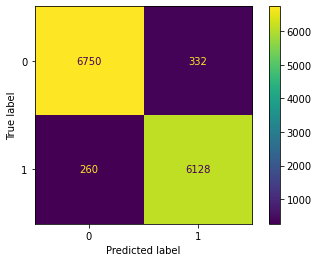

In [21]:
cm = metrics.confusion_matrix(y_test, pred)
metrics.plot_confusion_matrix(model,X_test,y_test);